# install dependancies, takes around 45 seconds

Rendering Dependancies



In [0]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Pacman Dependancies

In [2]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (40.8.0)


# Imports and Helper functions


In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

# Q-Learning Implementation

In [7]:
import gym

env = gym.make("Taxi-v2")
env.reset()
counter = 0
reward = 0
while reward < 20:
  #  print ("reward : ",reward,"ittereation : ",counter)
    state, reward, done, info = env.step(env.action_space.sample())
    counter +=1
print('Random Actions Complete the game in ',counter,'iterations')

Random Actions Complete the game in  2266 iterations


## Updating Q-Table in every iteration

In [0]:
import numpy as np
Q = np.zeros([env.observation_space.n, env.action_space.n])
G= 0
alpha = 0.2
l=[]
for episode in range(1000):
    done = False
    G, reward = 0,0
    state = env.reset()
    while done != True:
            action = np.argmax(Q[state]) #1
            state2, reward, done, info = env.step(action) #2
            Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
            G += reward
            state = state2
    l.append(G)  

In [0]:
import numpy as np
Q = np.zeros([env.observation_space.n, env.action_space.n])
alphalist = np.linspace(0.01,0.99,20)
l=[]
i=0
while i<len(alphalist):
      count = 0
      alpha = alphalist[i]
      G= 0
      while G<10:
          done = False
          G, reward = 0,0
          state = env.reset()
          while done != True:
                  action = np.argmax(Q[state]) #1
                  state2, reward, done, info = env.step(action) #2

                  Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
                  G += reward
                  state = state2
          count += 1
      l.append(count)
      i += 1 

## Plotting the reward obtained

Maximum available Reward = 20
Maximum Reward Obtained =  802


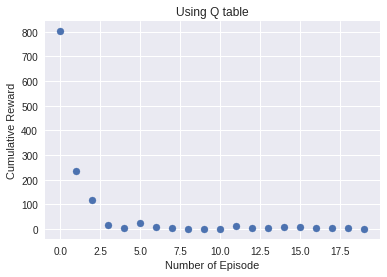

In [11]:
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
l = np.array(l)
#l_avg = np.mean(l.reshape(-1, 10), axis=1)   # Average reward over every 10 iterations
plt.scatter(np.arange(len(l)),l)
plt.xlabel('Number of Episode')
plt.ylabel('Cumulative Reward')
plt.title('Using Q table')
print('Maximum available Reward = 20')
print('Maximum Reward Obtained = ', np.max(l))
#plt.savefig('Reward vs Iteration.png')
#files.download("Reward vs Iteration.png") 

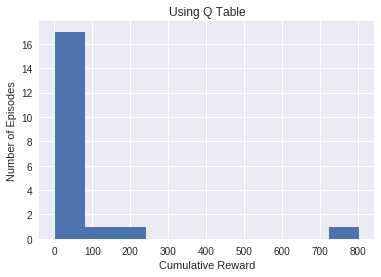

In [12]:
plt.hist(l)
plt.ylabel('Number of Episodes')
plt.xlabel('Cumulative Reward')
plt.title('Using Q Table');


[link text](https://)### Goal increases progressively as it should be in case of Q-Learning.
### Optimization over increasing Reward

In [13]:
Q.shape

(500, 6)

### The number of states are represented by rows and number of possible actions by columns

### use updated Q table

In [0]:
# using the updated Q values
import numpy as np
G= 0
alpha = 0.618
l=[]
for episode in range(1,1001):
    done = False
    G, reward = 0,0
    state = env.reset()
    while done != True:
            action = np.argmax(Q[state]) #1
            state, reward, done, info = env.step(action) #2
            #Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
            G += reward
            #state = state2
    l.append(G)


Text(0.5, 1.0, 'Reward in Basic Q-Learning')

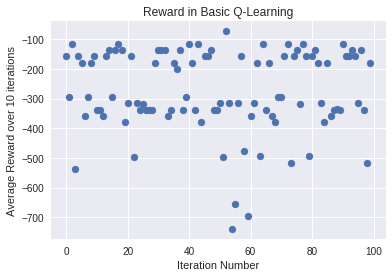

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
l = np.array(l)
l_avg = np.mean(l.reshape(-1, 10), axis=1)   # Average reward over every 10 iterations
plt.scatter(np.arange(len(l_avg)),l_avg)
plt.xlabel('Iteration Number')
plt.ylabel('Average Reward over 10 iterations')
plt.title('Reward in Basic Q-Learning')

### goal not fix which mean the agent has not learnt the environment yet. Still the values are positive we should appretiate that.

In [16]:
np.array(l).shape

env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


### just random steps. No Q table.

In [0]:
l=[]
for episode in range(1000):
    done = False
    G, reward = 0,0
    state = env.reset()
    while reward < 20:
            action = env.action_space.sample() #1
            state, reward, done, info = env.step(action) #2
            G += reward
    #if episode % 10 == 0:
#        print('Episode {} Total Reward: {}'.format(episode,G))
    l.append(G)

20


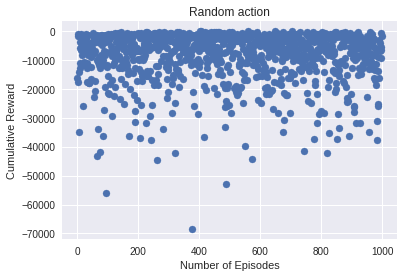

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(np.arange(len(l)),l)
plt.xlabel('Number of Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Random action')
print(reward)

-120

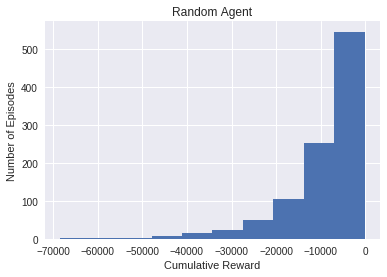

In [19]:
plt.hist(l);
plt.xlabel('Cumulative Reward')
plt.ylabel('Number of Episodes')
plt.title('Random Agent');
max(l)

In [20]:
import gym

env = gym.make("Taxi-v2")
env.reset()
counter = 0
reward = 0
while reward < 20:
  #  print ("reward : ",reward,"ittereation : ",counter)
    state, reward, done, info = env.step(env.action_space.sample())
    counter +=1
print('Random Actions Complete the game in ',counter,'iterations')

Random Actions Complete the game in  766 iterations


### Goal values are extremely negetive which tell that to complete the game the taxi has taken n number of wrong steps, silly!
### the agent is not only poor but it not wrong to say that it is of use